In [76]:
!pip install -r requirements.txt

In [77]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn 
import numpy as np

#### CRIANDO UM DATAFRAME


In [78]:
df = pd.read_csv("dados.csv")

#### PEGANDO UM DADO ALEATÓRIO



In [79]:
df.sample().T

,19
quantidade de funcionarios,20
tempo de mercado,48
utilizou crm,1
tempo de navegacao segundos,2689
lead,1


#### ANALISANDO ALGUNS DADOS POR GRÁFICOS



<Figure size 640x480 with 0 Axes>

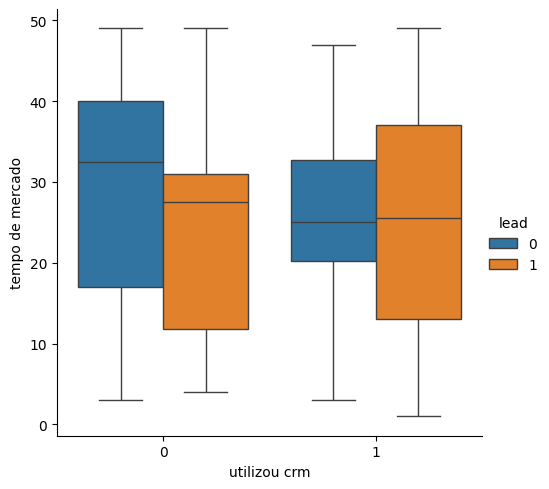

In [80]:
plt.figure()

sns.catplot(data = df, x="utilizou crm", y="tempo de mercado", kind="box", hue="lead")

plt.show()

<Figure size 640x480 with 0 Axes>

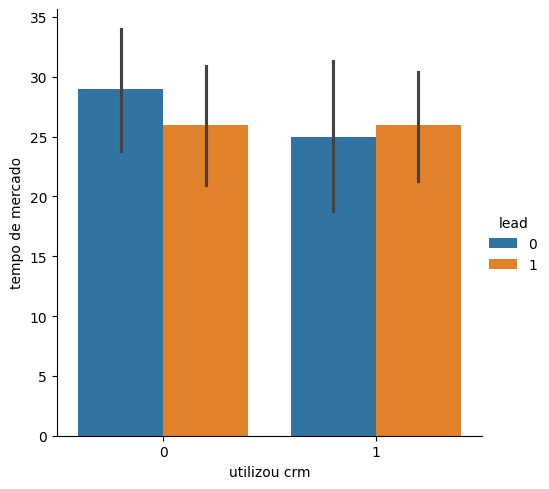

In [81]:
plt.figure()

sns.catplot(data = df, x="utilizou crm", y="tempo de mercado", kind="bar", hue="lead")

plt.show()

#### TREINANDO O MODELO

In [82]:
df.columns

Index(['quantidade de funcionarios', 'tempo de mercado', 'utilizou crm',
       'tempo de navegacao segundos', 'lead'],
      dtype='object')

In [83]:
X = df.drop("lead", axis=1)
y = df['lead']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train,y_train)
model

RandomForestClassifier()

In [86]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"acurácia de: {accuracy*100}")

acurácia de: 75.75757575757575


In [88]:
df.head().T

,0,1,2,3,4
quantidade de funcionarios,200,50,2,400,7
tempo de mercado,24,35,28,40,4
utilizou crm,1,1,1,0,1
tempo de navegacao segundos,2773,1312,3283,1130,2681
lead,1,0,1,0,0


In [89]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[ 9  4]
 [ 4 16]]


In [90]:
from sklearn.metrics import classification_report


# Relatório de classificação
class_report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(class_report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.80      0.80      0.80        20

    accuracy                           0.76        33
   macro avg       0.75      0.75      0.75        33
weighted avg       0.76      0.76      0.76        33



In [91]:
import pickle

model_file = "model_lead.pkl"

with open(model_file, "wb") as file:
    pickle.dump(model, file)